**Author**: Moch Nabil Farras Dhiya (10120034)

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: The **dataset** used in this analysis is a public dataset retrieved from [Customer Personality Analysis - Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount).

# Background

## Attributes

**People**

*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**


*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumWebVisitsMonth: Number of visits to company’s website in the last month
*   NumStorePurchases: Number of purchases made directly in stores

## Goals

Perform clustering to summarize customer segments.

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV

/content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV


# Import Packages

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.cluster import AgglomerativeClustering 

from statistics import mean
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances

# Import Data

In [4]:
data = pd.read_csv("marketing_campaign.csv", sep = '\t')

# Initial EDA

In [5]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Notice that income columns have null values.

In [6]:
# Display 10 random rows

data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1252,5153,1967,PhD,Married,77766.0,0,1,22-02-2013,97,1004,...,6,1,0,0,0,0,0,3,11,1
562,9780,1971,Master,Together,71499.0,0,1,25-06-2013,12,465,...,4,0,0,0,0,0,0,3,11,0
1971,4338,1983,Graduation,Single,39062.0,1,0,25-03-2014,28,23,...,4,1,0,0,0,0,0,3,11,0
36,4339,1970,PhD,Married,67353.0,0,1,31-12-2013,37,702,...,2,0,0,0,0,0,0,3,11,0
108,3629,1978,Graduation,Single,38557.0,1,0,19-12-2012,17,76,...,7,0,0,0,0,0,0,3,11,0
1628,9986,1982,Graduation,Together,19444.0,1,0,22-02-2014,8,16,...,7,0,0,0,0,0,0,3,11,1
338,9560,1965,Graduation,Together,83003.0,0,0,03-03-2013,18,856,...,3,0,0,1,0,0,0,3,11,1
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
508,3386,1992,Graduation,Married,34935.0,0,0,21-06-2013,71,34,...,7,0,0,0,0,0,0,3,11,0
1773,8584,1952,PhD,Together,85431.0,0,0,08-06-2013,54,376,...,0,0,0,0,0,0,0,3,11,0


In [7]:
for col in data.columns:
  print(f"\n======================= {col} =======================")
  display(data[col].value_counts())


======================= ID =======================


5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64


======================= Year_Birth =======================


1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


======================= Education =======================


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


======================= Marital_Status =======================


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


======================= Income =======================


7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64


======================= Kidhome =======================


0    1293
1     899
2      48
Name: Kidhome, dtype: int64


======================= Teenhome =======================


0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


======================= Dt_Customer =======================


31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64


======================= Recency =======================


56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64


======================= MntWines =======================


2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: MntWines, Length: 776, dtype: int64


======================= MntFruits =======================


0      400
1      162
2      120
3      116
4      104
      ... 
164      1
130      1
189      1
101      1
154      1
Name: MntFruits, Length: 158, dtype: int64


======================= MntMeatProducts =======================


7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: MntMeatProducts, Length: 558, dtype: int64


======================= MntFishProducts =======================


0      384
2      156
3      130
4      108
6       82
      ... 
232      1
167      1
247      1
194      1
229      1
Name: MntFishProducts, Length: 182, dtype: int64


======================= MntSweetProducts =======================


0      419
1      161
2      128
3      101
4       82
      ... 
146      1
132      1
167      1
99       1
111      1
Name: MntSweetProducts, Length: 177, dtype: int64


======================= MntGoldProds =======================


1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Name: MntGoldProds, Length: 213, dtype: int64


======================= NumDealsPurchases =======================


1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64


======================= NumWebPurchases =======================


2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64


======================= NumCatalogPurchases =======================


0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64


======================= NumStorePurchases =======================


3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64


======================= NumWebVisitsMonth =======================


7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


======================= AcceptedCmp3 =======================


0    2077
1     163
Name: AcceptedCmp3, dtype: int64


======================= AcceptedCmp4 =======================


0    2073
1     167
Name: AcceptedCmp4, dtype: int64


======================= AcceptedCmp5 =======================


0    2077
1     163
Name: AcceptedCmp5, dtype: int64


======================= AcceptedCmp1 =======================


0    2096
1     144
Name: AcceptedCmp1, dtype: int64


======================= AcceptedCmp2 =======================


0    2210
1      30
Name: AcceptedCmp2, dtype: int64


======================= Complain =======================


0    2219
1      21
Name: Complain, dtype: int64


======================= Z_CostContact =======================


3    2240
Name: Z_CostContact, dtype: int64


======================= Z_Revenue =======================


11    2240
Name: Z_Revenue, dtype: int64


======================= Response =======================


0    1906
1     334
Name: Response, dtype: int64

Notice that some variables (columns) have multiple answers with the same meaning (e.g. Marital Status and Kidhome-Teenhome), which can be simplified to easier our analysis process. But, we need to check first if that is actually valid to do.

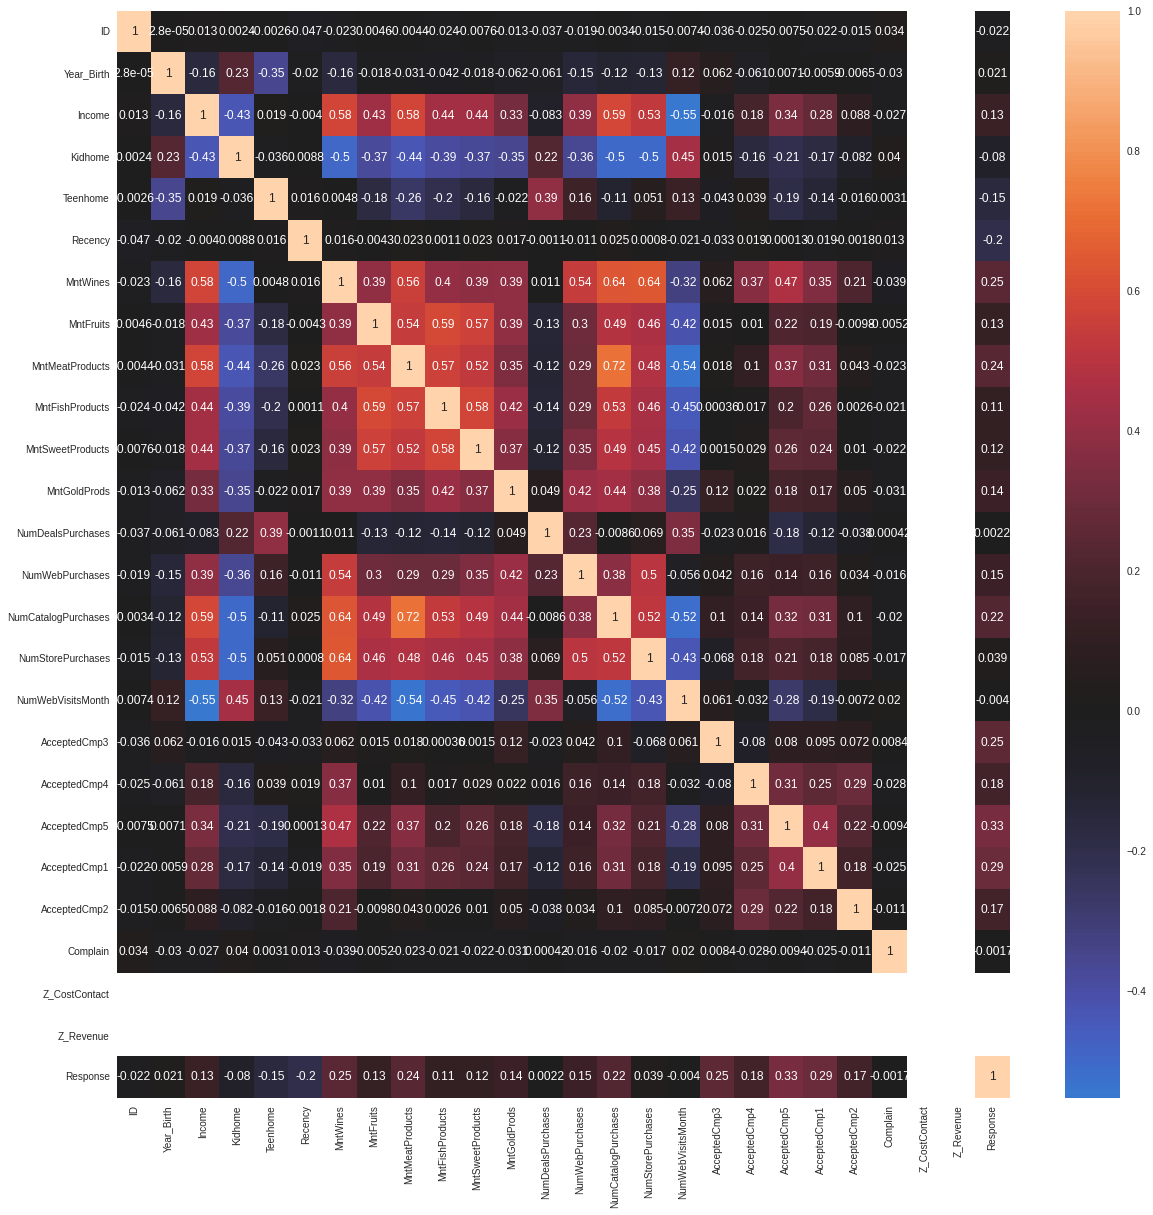

In [8]:
corrmat = data.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

Based on the matrix corr above, we definitely can not combine the Kidhome and Teenhome columns into a single column.

# Missing Values and Outliers Handling

In [9]:
data[data.isna().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [10]:
# We will search the percentage of missing values to decide what step is suitable to handle the situation

for col in data.columns:
    percentage = 100*data[col].isna().sum()/len(data)
    print(f"Missing value percentage in {col}: {percentage}%")

Missing value percentage in ID: 0.0%
Missing value percentage in Year_Birth: 0.0%
Missing value percentage in Education: 0.0%
Missing value percentage in Marital_Status: 0.0%
Missing value percentage in Income: 1.0714285714285714%
Missing value percentage in Kidhome: 0.0%
Missing value percentage in Teenhome: 0.0%
Missing value percentage in Dt_Customer: 0.0%
Missing value percentage in Recency: 0.0%
Missing value percentage in MntWines: 0.0%
Missing value percentage in MntFruits: 0.0%
Missing value percentage in MntMeatProducts: 0.0%
Missing value percentage in MntFishProducts: 0.0%
Missing value percentage in MntSweetProducts: 0.0%
Missing value percentage in MntGoldProds: 0.0%
Missing value percentage in NumDealsPurchases: 0.0%
Missing value percentage in NumWebPurchases: 0.0%
Missing value percentage in NumCatalogPurchases: 0.0%
Missing value percentage in NumStorePurchases: 0.0%
Missing value percentage in NumWebVisitsMonth: 0.0%
Missing value percentage in AcceptedCmp3: 0.0%
Miss

Since the missing percentage are less than 25%, we can do imputation on the data in the next step of the data preparation. We will analyze the data further to determine the suitable imputation for this column, whether it is 'mean' or 'median' imputation.

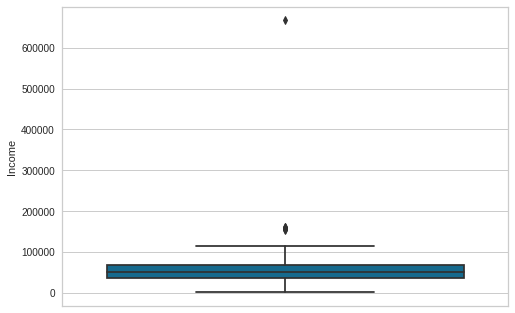

In [11]:
sns.boxplot(y = data["Income"])

There is an outlier in the data. So, we need to remove that particular outlier (>600K income).

In [12]:
data = data[data['Income'] < 600000]

Also notice from previous segment, we found customers that was born in the 1800s. We will also check the boxplot for that column.

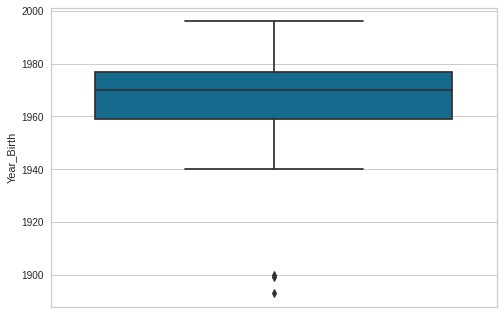

In [13]:
sns.boxplot(y = data["Year_Birth"])

There is indeed outliers in the data. So, we need to remove that particular outliers (was born in the 1800s to early 1900s).

In [14]:
data = data[data['Year_Birth'] > 1920]

Skewness: 0.347791933529504


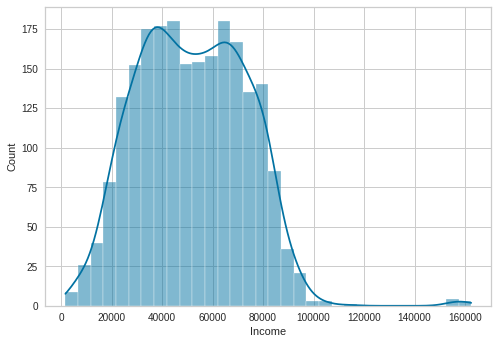

In [15]:
rating = data.loc[data["Income"].isna() == False]
print("Skewness:", skew(rating["Income"]))

sns.histplot(x = "Income", data = rating, kde = True)

Notice that since the skewness is in the interval [-0.5, 0.5] and based on the graph above, we can then use mean imputation on the missing values data.

In [16]:
# Mean imputation on Income column

data["Income"].fillna(data["Income"].mean())

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2212, dtype: float64

# Duplicate Rows Handling

In [17]:
print(len(data.drop_duplicates())/len(data))

1.0


Notice that since the ratio is 1, then there is no duplicate in the data.

# Data Manipulation

As stated before, there are some values in which have the same meaning on several columns. Furthermore, there are also columns in which we can simplified by combining it into a single column.

## Age

In [18]:
data["Age"] = 2022 - data["Year_Birth"]

## Dt_Customer

Convert the datatype of Dt_Customer column into datetime and calculate the # of days since they become a customer.

In [19]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format = "%d-%m-%Y")

In [20]:
data["Duration_Customer"] = (pd.to_datetime(dt.datetime.today().strftime("%d-%m-%Y")) - data["Dt_Customer"]).dt.days

## Education

In [21]:
def education(text):
  if text == '2n Cycle':
    return "Master"

  else:
    return text

data['Education'] = data['Education'].apply(education)

## Rename Columns

In [22]:
data = data.rename(columns = {'MntWines': "Wines", 'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Gold', 
                              'NumWebPurchases': "Web", 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store', 'NumDealsPurchases': 'Discount', 'NumWebVisitsMonth': 'Web_visit',
                              'AcceptedCmp3': 'Campaign 3', 'AcceptedCmp4': 'Campaign 4', 'AcceptedCmp5': 'Campaign 5', 'AcceptedCmp1': 'Campaign 1', 'AcceptedCmp2': 'Campaign 2'})

## Dropping Columns

In [23]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Discount', 'Web', 'Catalog', 'Store', 'Web_visit',
       'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 1', 'Campaign 2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Duration_Customer'],
      dtype='object')

In [24]:
data = data[["ID", "Age", "Education", "Marital_Status", "Income", 'Kidhome', 'Teenhome', "Duration_Customer", 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
             'Sweets', 'Gold', 'Discount', 'Web', 'Catalog', 'Store', 'Web_visit', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Complain', 'Response']]

# Data Preprocessing

In [25]:
label_encoder = preprocessing.LabelEncoder()

## Education

To make clustering easier, we can group the answers in Education column into categories. And since the values in this column are ordinal, it is more wise if we use Label Encoding on this column.

In [26]:
data['Education'].head(20)

0     Graduation
1     Graduation
2     Graduation
3     Graduation
4            PhD
5         Master
6     Graduation
7            PhD
8            PhD
9            PhD
11         Basic
12    Graduation
13        Master
14    Graduation
15           PhD
16    Graduation
17    Graduation
18        Master
19        Master
20    Graduation
Name: Education, dtype: object

In [27]:
data['Education'] = label_encoder.fit_transform(data['Education']) 

In [28]:
data['Education'].head(20)

0     1
1     1
2     1
3     1
4     3
5     2
6     1
7     3
8     3
9     3
11    0
12    1
13    2
14    1
15    3
16    1
17    1
18    2
19    2
20    1
Name: Education, dtype: int64

Dictionary:

---

0: Basic

1: Graduation

2: Master

3: PhD

## Marital Status

Notice that we can simplified the values in this column into 2 values: Single and Relationship, then do Label Encoding on these values.

In [29]:
data['Marital_Status'] = data['Marital_Status'].apply(lambda x: "Relationship" if (x == "Married" or x == "Together") else "Single")

data['Marital_Status'].head(20)

0           Single
1           Single
2     Relationship
3     Relationship
4     Relationship
5     Relationship
6           Single
7     Relationship
8     Relationship
9     Relationship
11    Relationship
12          Single
13          Single
14    Relationship
15          Single
16    Relationship
17    Relationship
18    Relationship
19          Single
20    Relationship
Name: Marital_Status, dtype: object

In [30]:
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status']) 

data['Marital_Status'].head(20)

0     1
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
11    0
12    1
13    1
14    0
15    1
16    0
17    0
18    0
19    1
20    0
Name: Marital_Status, dtype: int64

Dictionary:

---

0: Relationship

1: Single

## Income

To ease our clustering, we will categorized the customers income to 4 category. In 2021-2022. The World Bank assigns the world’s economies to four income groups—low, lower-middle, upper-middle, and high-income countries. After that, we will convert these values into number by Label Encoding.

In [31]:
pd.qcut(data['Income'], 4).unique()

[(51371.0, 68487.0], (35233.5, 51371.0], (68487.0, 162397.0], (1729.999, 35233.5]]
Categories (4, interval[float64, right]): [(1729.999, 35233.5] < (35233.5, 51371.0] <
                                           (51371.0, 68487.0] < (68487.0, 162397.0]]

In [32]:
data["Income"] = pd.qcut(data['Income'], 4, labels = ['Low', 'Lower-middle', 'Upper-middle', 'High'])

data['Income'].head(20)

0     Upper-middle
1     Lower-middle
2             High
3              Low
4     Upper-middle
5     Upper-middle
6     Upper-middle
7              Low
8              Low
9              Low
11             Low
12    Upper-middle
13    Upper-middle
14             Low
15            High
16    Lower-middle
17    Lower-middle
18            High
19             Low
20    Lower-middle
Name: Income, dtype: category
Categories (4, object): ['Low' < 'Lower-middle' < 'Upper-middle' < 'High']

In [33]:
data['Income'] = label_encoder.fit_transform(data['Income']) 

data['Income'].head(20)

0     3
1     2
2     0
3     1
4     3
5     3
6     3
7     1
8     1
9     1
11    1
12    3
13    3
14    1
15    0
16    2
17    2
18    0
19    1
20    2
Name: Income, dtype: int64

Dictionary:

---

0: High (68487.0, 162397.0]

1: Low (1729.999, 35233.5]

2: Lower-middle (35233.5, 51371.0]

3: Upper-middle (51371.0, 68487.0]

## Final Data

In [34]:
data.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Duration_Customer', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4',
       'Campaign 5', 'Complain', 'Response'],
      dtype='object')

As we want to make clusters for each of the products, we will make a copy of the dataframe.

In [35]:
data_wines = data.copy()

data_wines = data_wines.drop(columns = ['ID', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

data_fruits = data.copy()

data_fruits = data_fruits.drop(columns = ['ID', 'Wines', 'Meat', 'Fish', 'Sweets', 'Gold', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

data_meat = data.copy()

data_meat = data_meat.drop(columns = ['ID', 'Wines', 'Fruits', 'Fish', 'Sweets', 'Gold', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

data_fish = data.copy()

data_fish = data_fish.drop(columns = ['ID', 'Wines', 'Fruits', 'Meat', 'Sweets', 'Gold', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

data_sweets = data.copy()

data_sweets = data_sweets.drop(columns = ['ID', 'Wines', 'Fruits', 'Meat', 'Fish', 'Gold', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

data_gold = data.copy()

data_gold = data_gold.drop(columns = ['ID', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Discount', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Complain', 'Response'])

In [36]:
scaler = StandardScaler()

### Wines

In [37]:
scaler.fit(data_wines)
scaled_wines = pd.DataFrame(scaler.transform(data_wines),columns = data_wines.columns )

### Fruits

In [38]:
scaler.fit(data_fruits)
scaled_fruits = pd.DataFrame(scaler.transform(data_fruits),columns = data_fruits.columns )

### Meats

In [39]:
scaler.fit(data_meat)
scaled_meat = pd.DataFrame(scaler.transform(data_meat),columns = data_meat.columns )

### Fish

In [40]:
scaler.fit(data_fish)
scaled_fish = pd.DataFrame(scaler.transform(data_fish),columns = data_fish.columns )

### Sweets

In [41]:
scaler.fit(data_sweets)
scaled_sweets = pd.DataFrame(scaler.transform(data_sweets),columns = data_sweets.columns )

### Golds

In [42]:
scaler.fit(data_gold)
scaled_gold = pd.DataFrame(scaler.transform(data_gold),columns = data_gold.columns )

# Correlation Graph

### Full Data

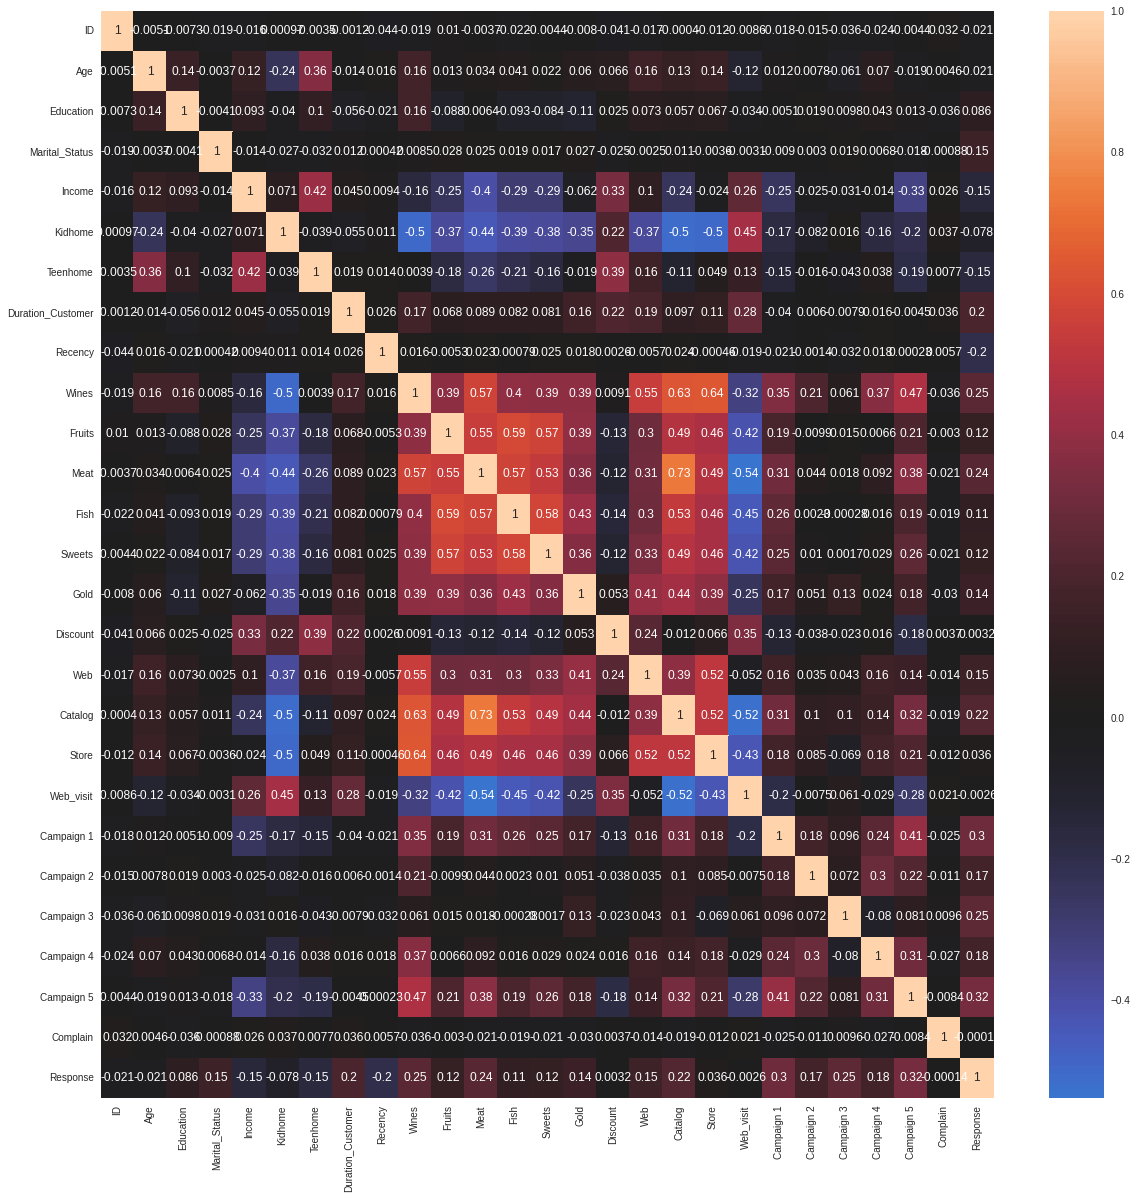

In [43]:
corrmat = data.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Wines

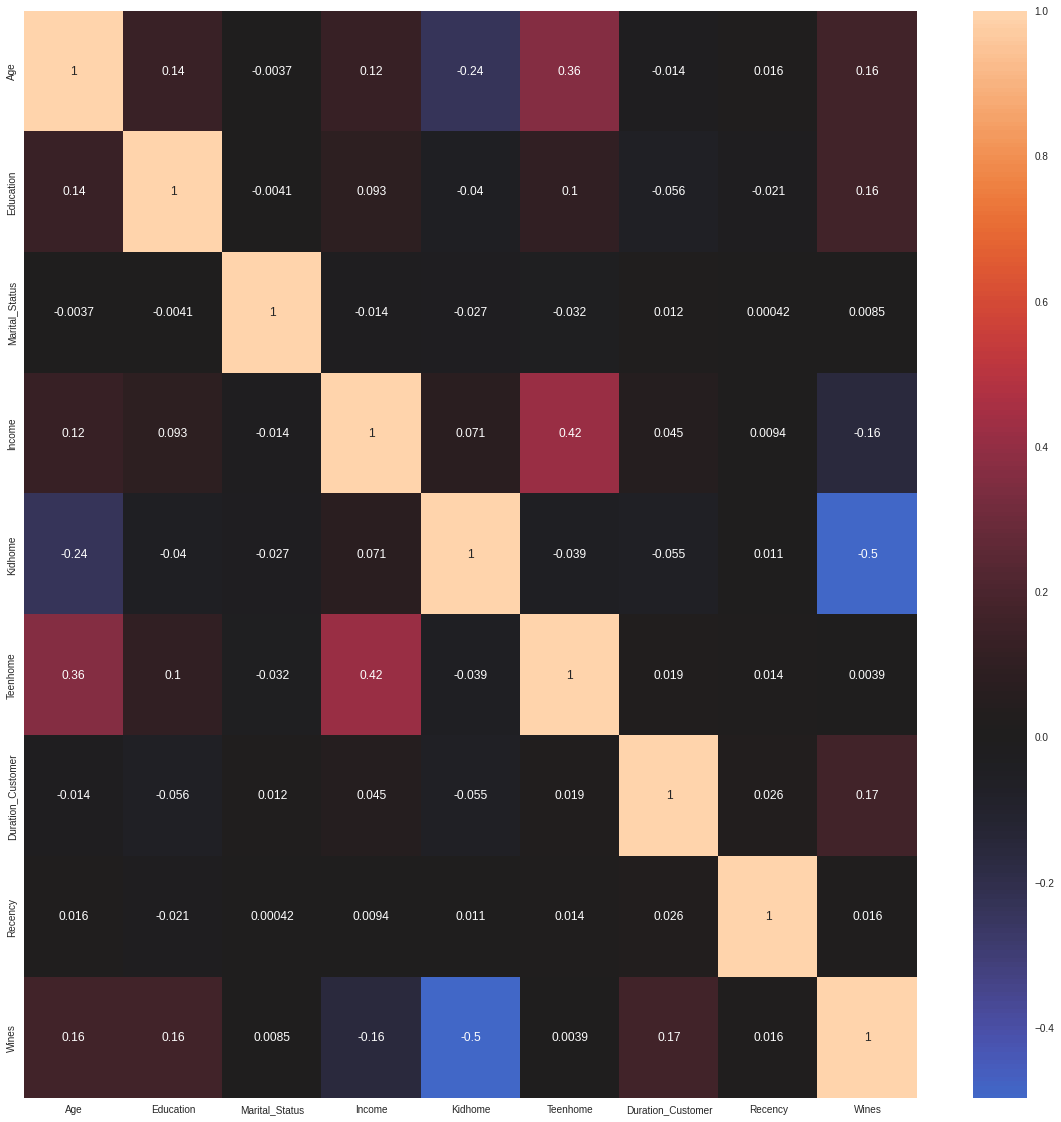

In [44]:
corrmat = data_wines.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Fruits

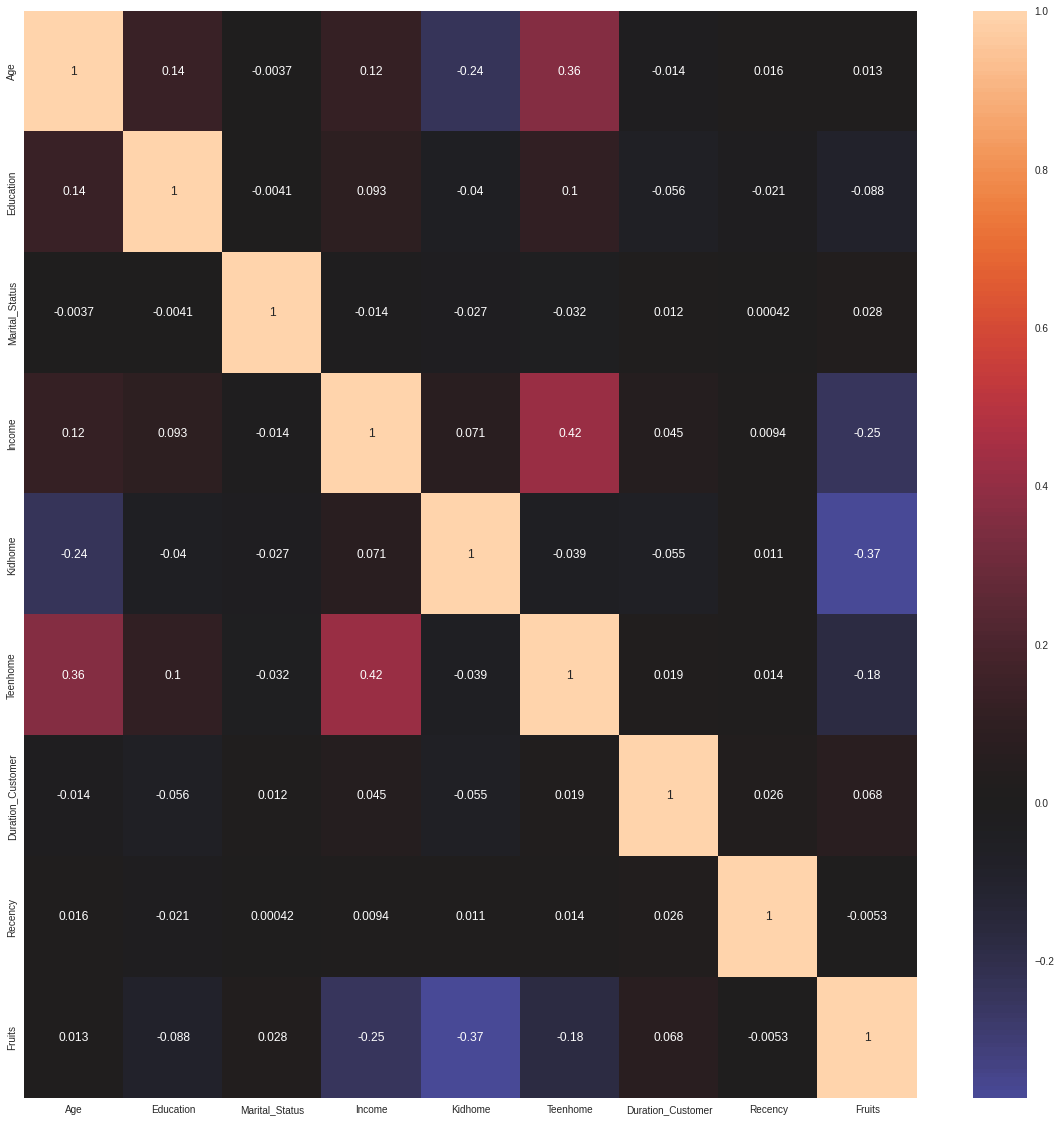

In [45]:
corrmat = data_fruits.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Meats

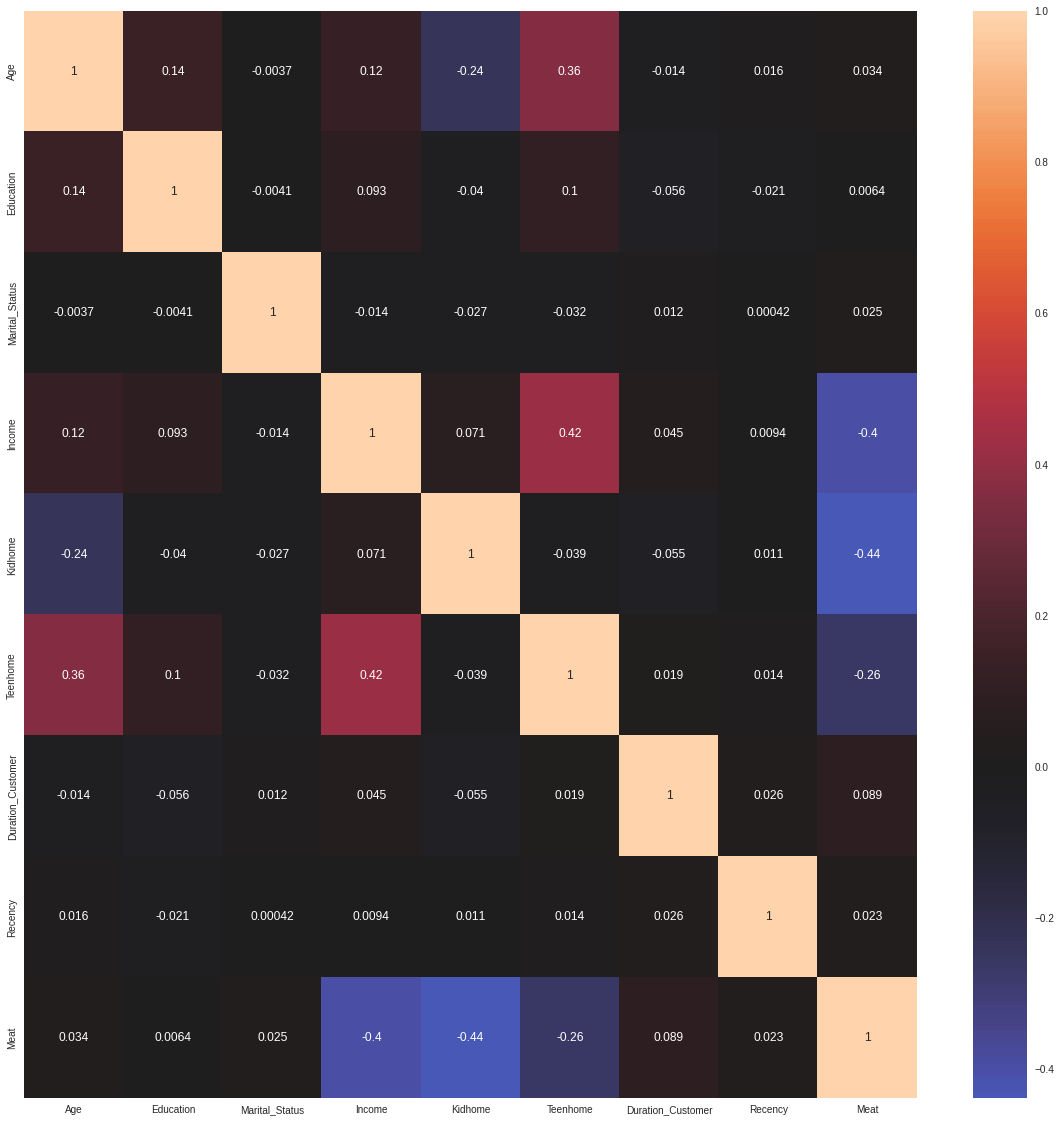

In [46]:
corrmat = data_meat.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Fish

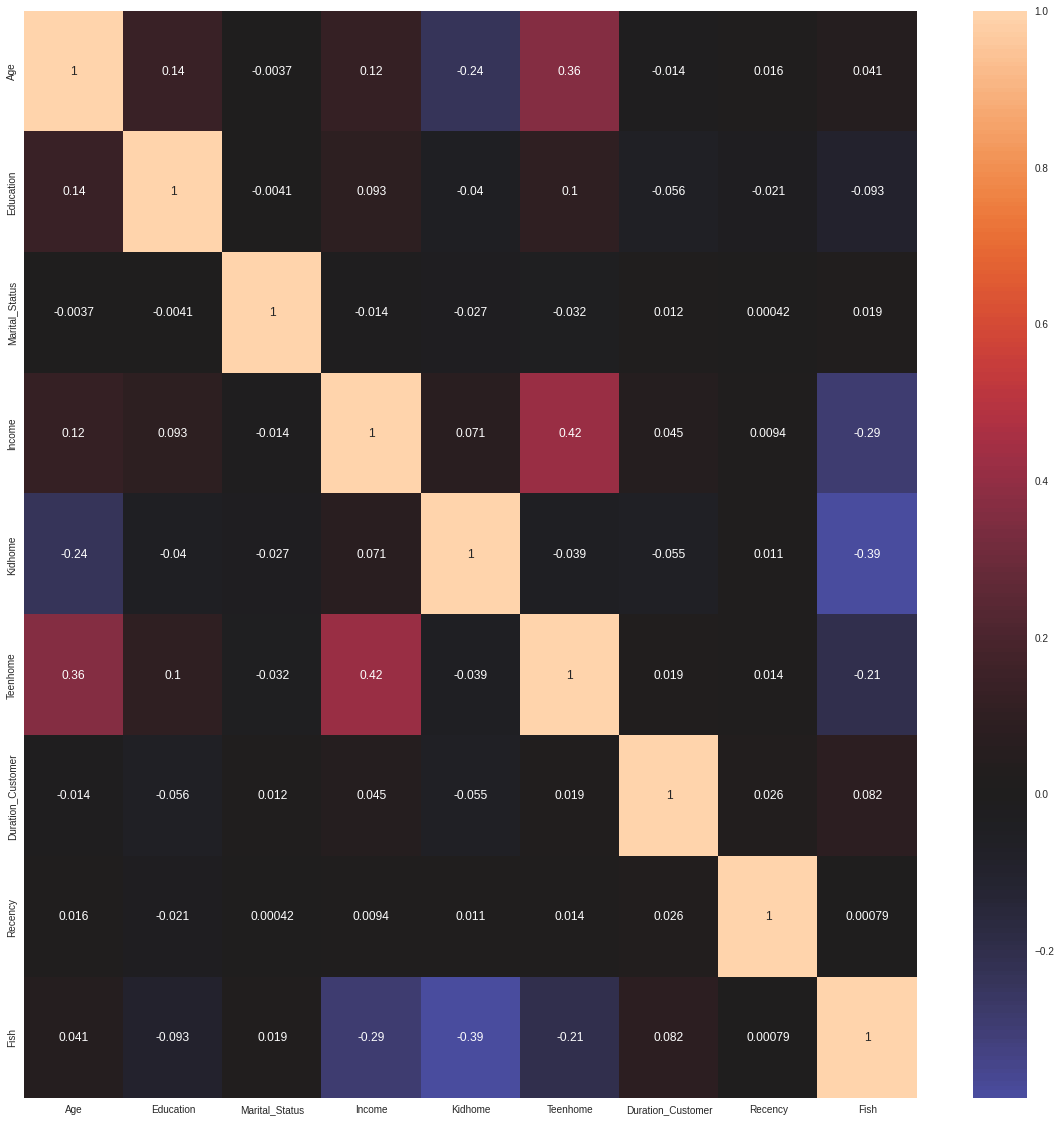

In [47]:
corrmat = data_fish.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Sweets

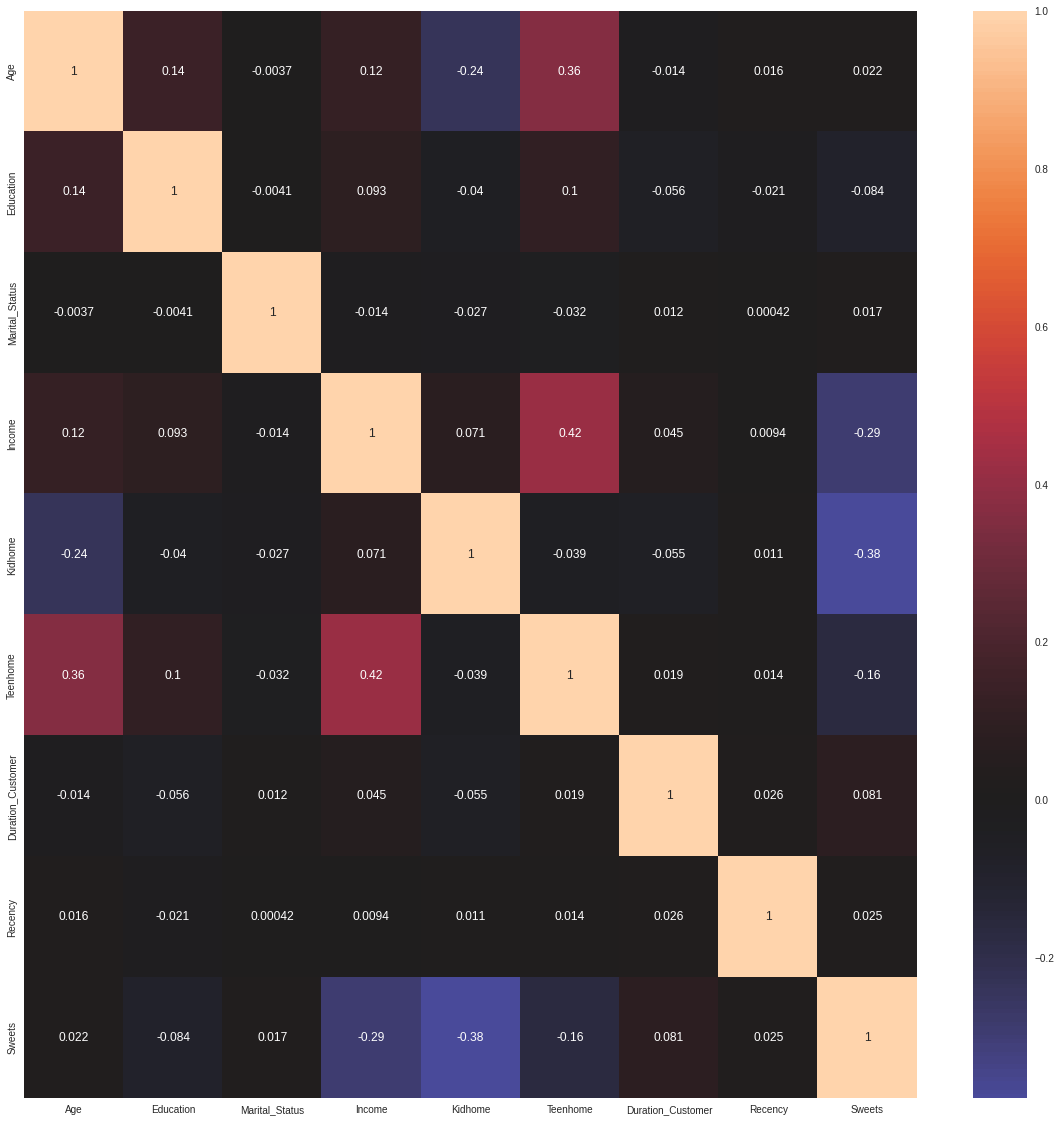

In [48]:
corrmat = data_sweets.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

### Golds

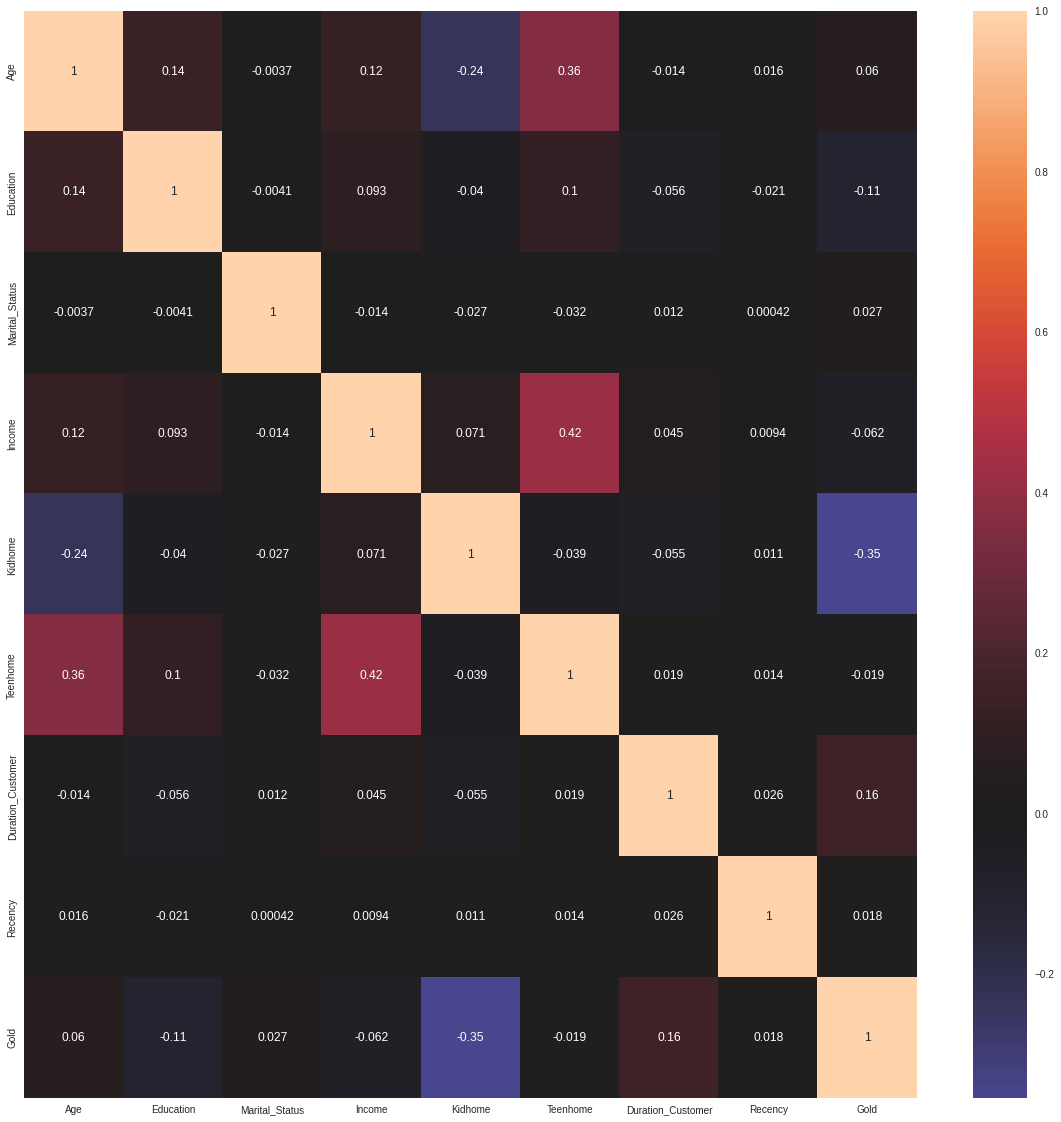

In [49]:
corrmat = data_gold.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot = True, center = 0)

# Clustering

## Elbow Method

In [50]:
# class PFA(object):
#     def __init__(self, n_features, q=None):
#         self.q = q
#         self.n_features = n_features
    
#     def fit(self, X):
#         if not self.q:
#             self.q = X.shape[1]
    
#         sc = StandardScaler()
#         X = sc.fit_transform(X)
    
#         pca = PCA(n_components=self.q).fit(X) # calculation Covmatrix is embeded in PCA
#         A_q = pca.components_.T
    
#         kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
#         clusters = kmeans.predict(A_q)
#         cluster_centers = kmeans.cluster_centers_
    
#         dists = defaultdict(list)
#         for i, c in enumerate(clusters):
#             dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
#             dists[c].append((i, dist))
    
#         self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
#         self.features_ = X[:, self.indices_]

### Wines

In [51]:
# Initiating PCA to reduce dimentions aka features to 3

pca_wines = PCA(n_components = 3)
pca_wines.fit(scaled_wines)
PCA_wines = pd.DataFrame(pca_wines.transform(scaled_wines), columns = (["col1", "col2", "col3"]))
PCA_wines.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.288706e-17,1.334876,-3.151590,-1.058098,0.066887,0.979038,3.990259
col2,2212.0,5.019091e-18,1.255933,-3.123688,-0.911649,-0.150926,0.794433,3.221752
col3,2212.0,4.418055e-17,1.036328,-2.594919,-0.776059,0.008596,0.752247,2.990274


Then, we will calculate the optimal # of cluster using Elbow Method.

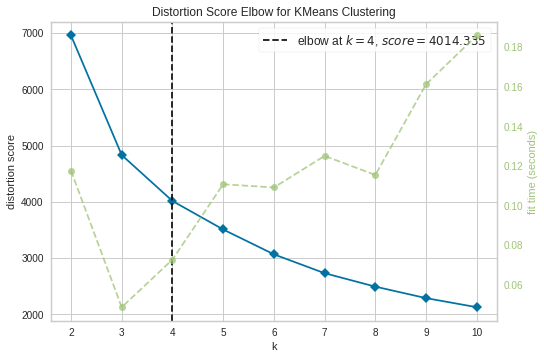

In [52]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_wines)
Elbow_M.show()

### Fruits

In [53]:
# Initiating PCA to reduce dimentions aka features to 3

pca_fruits = PCA(n_components = 3)
pca_fruits.fit(scaled_fruits)
PCA_fruits = pd.DataFrame(pca_fruits.transform(scaled_fruits), columns = (["col1", "col2", "col3"]))
PCA_fruits.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.830768e-17,1.330715,-3.527409,-0.988850,-0.084295,1.125606,3.543471
col2,2212.0,-2.394107e-17,1.219522,-3.239021,-1.094903,0.112427,0.956360,3.618247
col3,2212.0,-1.096671e-17,1.037178,-2.567090,-0.772462,0.010442,0.749152,3.077983


Then, we will calculate the optimal # of cluster using Elbow Method.

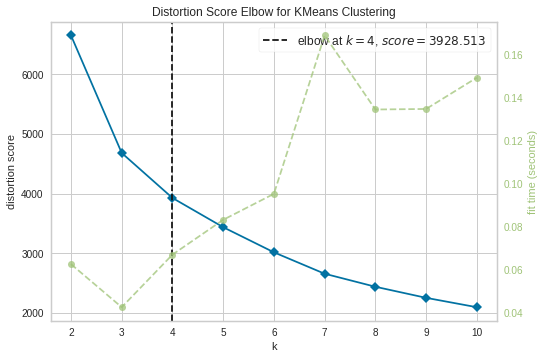

In [54]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_fruits)
Elbow_M.show()

### Meat

In [55]:
# Initiating PCA to reduce dimentions aka features to 3

pca_meat = PCA(n_components = 3)
pca_meat.fit(scaled_meat)
PCA_meat = pd.DataFrame(pca_meat.transform(scaled_meat), columns = (["col1", "col2", "col3"]))
PCA_meat.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.304964e-17,1.369179,-3.324716,-1.114600,-0.047328,0.746179,5.277098
col2,2212.0,-2.308782e-17,1.241502,-3.223576,-1.043425,0.140409,0.986036,3.363038
col3,2212.0,1.762956e-17,1.035467,-2.636442,-0.773999,0.011055,0.750422,2.801722


Then, we will calculate the optimal # of cluster using Elbow Method.

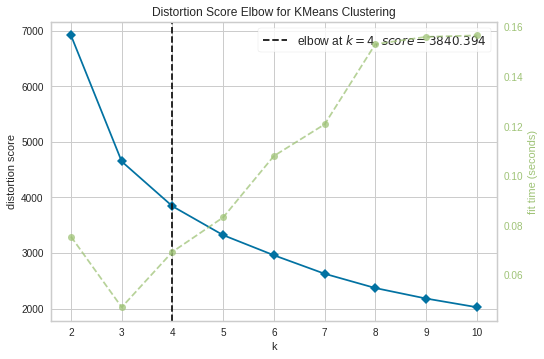

In [56]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_meat)
Elbow_M.show()

### Fish

In [57]:
# Initiating PCA to reduce dimentions aka features to 3

pca_fish = PCA(n_components = 3)
pca_fish.fit(scaled_fish)
PCA_fish = pd.DataFrame(pca_fish.transform(scaled_fish), columns = (["col1", "col2", "col3"]))
PCA_fish.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.887178e-17,1.340619,-3.518366,-1.131935,0.064398,0.981540,4.028475
col2,2212.0,1.156273e-17,1.228666,-3.224505,-1.077863,0.101300,0.967072,3.860185
col3,2212.0,1.842007e-17,1.037080,-2.538385,-0.766561,0.004178,0.741855,3.072007


Then, we will calculate the optimal # of cluster using Elbow Method.

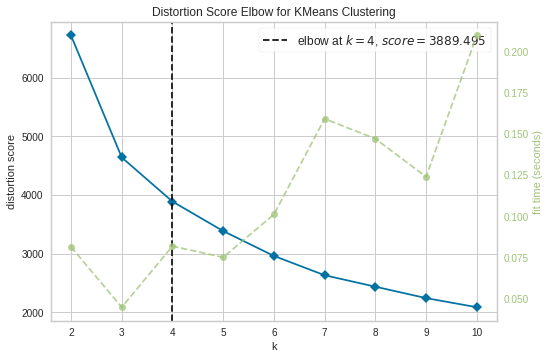

In [58]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_fish)
Elbow_M.show()

### Sweets

In [59]:
# Initiating PCA to reduce dimentions aka features to 3

pca_sweets = PCA(n_components = 3)
pca_sweets.fit(scaled_sweets)
PCA_sweets = pd.DataFrame(pca_sweets.transform(scaled_sweets), columns = (["col1", "col2", "col3"]))
PCA_sweets.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-2.850844e-17,1.334138,-3.598646,-1.131678,0.037676,0.977645,3.642473
col2,2212.0,-2.301567e-17,1.225755,-3.236341,-1.082177,0.093625,0.931090,4.342178
col3,2212.0,-4.542278e-18,1.037621,-2.570907,-0.759923,-0.002341,0.752879,2.852520


Then, we will calculate the optimal # of cluster using Elbow Method.

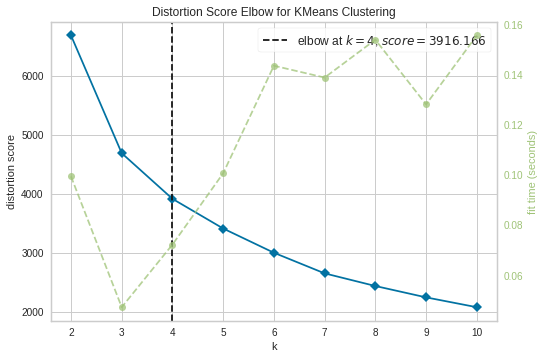

In [60]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_sweets)
Elbow_M.show()

### Gold

In [61]:
# Initiating PCA to reduce dimentions aka features to 3

pca_gold = PCA(n_components = 3)
pca_gold.fit(scaled_gold)
PCA_gold = pd.DataFrame(pca_gold.transform(scaled_gold), columns = (["col1", "col2", "col3"]))
PCA_gold.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-2.007637e-17,1.303377,-2.719578,-1.184593,-0.010579,1.050791,3.943952
col2,2212.0,-5.320237e-17,1.216175,-3.271392,-0.925127,-0.090233,0.783189,4.071697
col3,2212.0,-2.464374e-17,1.049765,-2.784399,-0.774841,-0.004627,0.713510,3.686365


Then, we will calculate the optimal # of cluster using Elbow Method.

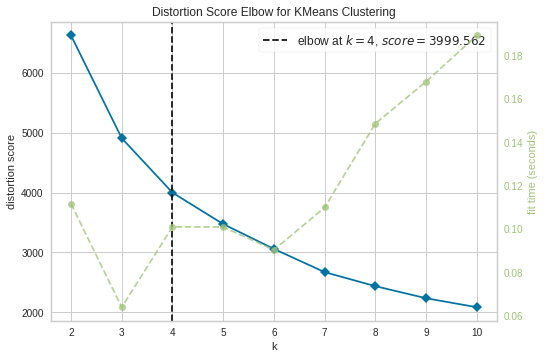

In [62]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_gold)
Elbow_M.show()

## # of Cluster

Since we do not have any idea what the customer segments will be, we will cluster the customers based on the computer calculation. Thus, we will use hierarchical clustering. And it is obvious that on this case, Agglomerative clustering (with n = 5 for each products based on the Elbow Methods above) is more logical rather than Divisise Clustering.

## Agglomerative Clustering

### Wines

In [63]:
hc_wines = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [64]:
y_hc_wines = hc_wines.fit_predict(PCA_wines)

data_wines["Cluster"] = y_hc_wines

### Fruits

In [65]:
hc_fruits = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [66]:
y_hc_fruits = hc_fruits.fit_predict(PCA_fruits)

data_fruits["Cluster"] = y_hc_fruits

### Meat

In [67]:
hc_meat = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [68]:
y_hc_meat = hc_meat.fit_predict(PCA_meat)

data_meat["Cluster"] = y_hc_meat

### Fish

In [69]:
hc_fish = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [70]:
y_hc_fish = hc_fish.fit_predict(PCA_fish)

data_fish["Cluster"] = y_hc_fish

### Sweets

In [71]:
hc_sweets = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [72]:
y_hc_sweets = hc_sweets.fit_predict(PCA_sweets)

data_sweets["Cluster"] = y_hc_sweets

### Gold

In [73]:
hc_gold = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [74]:
y_hc_gold = hc_gold.fit_predict(PCA_gold)

data_gold["Cluster"] = y_hc_gold

# Model Interpretation

## Wines

In [75]:
data_wines.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Wines', 'Cluster'],
      dtype='object')

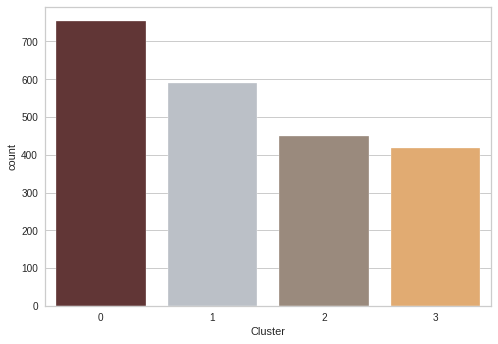

In [76]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_wines, palette = pal)

In [77]:
potential_wines_cluster = data_wines[data_wines['Wines'] > data_wines['Wines'].mean()]['Cluster'].values

dct_wines = {}
for item in potential_wines_cluster:
  if item not in dct_wines:
    dct_wines[item] = 1

  else:
    dct_wines[item] += 1

for key, value in dct_wines.items():
  print(f"Cluster {key} percentage: {100*value/len(data_wines[data_wines['Cluster'] == key])} %")

Cluster 2 percentage: 88.64142538975501 %
Cluster 3 percentage: 59.665871121718375 %
Cluster 0 percentage: 10.875331564986737 %
Cluster 1 percentage: 21.1864406779661 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [78]:
for col in data_wines.columns:
  print(f"============ {col} ============")
  print(data_wines[data_wines['Cluster'] == 2][col].value_counts())
  print()

============ Age ============
57    20
52    17
51    17
64    16
40    15
50    14
60    14
47    13
53    13
62    13
63    13
70    12
67    12
46    12
65    10
68    10
73    10
48    10
74    10
71    10
36     9
39     9
69     9
56     9
45     9
61     8
35     8
49     8
66     8
75     8
34     7
44     7
55     7
31     7
38     6
59     6
41     6
58     6
42     5
43     5
76     5
33     4
54     4
32     3
29     3
77     3
78     3
30     3
27     3
72     3
79     2
28     2
37     2
81     1
Name: Age, dtype: int64

============ Education ============
1    229
3    116
2    104
Name: Education, dtype: int64

============ Marital_Status ============
0    286
1    163
Name: Marital_Status, dtype: int64

============ Income ============
0    425
3     16
2      6
1      2
Name: Income, dtype: int64

============ Kidhome ============
0    438
1     11
Name: Kidhome, dtype: int64

============ Teenhome ============
0    386
1     63
Name: Teenhome, dtype: int64

=========

Text(0.5, 1.0, 'Potential wine buyers age distribution')

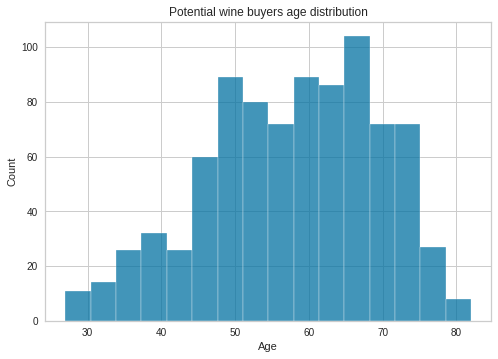

In [79]:
sns.histplot(data_wines[(data_wines['Cluster'] == 2) | (data_wines['Cluster'] == 3)]['Age'])
plt.title('Potential wine buyers age distribution')

In [80]:
data_wines[(data_wines['Cluster'] == 2) | (data_wines['Cluster'] == 3)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts().head(10)

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           114
1               1          0       0        0            65
0               3          3       0        1            62
                           0       0        0            57
                2          0       0        0            51
1               2          0       0        0            36
0               1          0       0        1            34
1               3          0       0        0            32
0               1          3       0        1            31
                2          3       0        1            29
dtype: int64

In [81]:
# pl = sns.scatterplot(data = data_wines, x = data_wines["Age"], y = data_wines["Education"], hue = data_wines["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential wine buyers are most likely to have these criterias:

1.   In their late **40**s to early **70**s.
2.   **Higher education** (at least a university graduate).
3.   **Do not** have any kid and **at most** 1 teen at home.
4.   Have **upper-middle** or **high income** (USD 51K++ Annual income).

## Fruits

In [82]:
data_fruits.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Fruits', 'Cluster'],
      dtype='object')

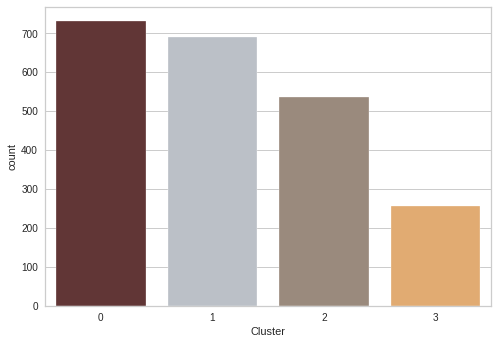

In [83]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_fruits, palette = pal)

In [84]:
potential_fruits_cluster = data_fruits[data_fruits['Fruits'] > data_fruits['Fruits'].mean()]['Cluster'].values

dct_fruits = {}
for item in potential_fruits_cluster:
  if item not in dct_fruits:
    dct_fruits[item] = 1

  else:
    dct_fruits[item] += 1

for key, value in dct_fruits.items():
  print(f"Cluster {key} percentage: {100*value/len(data_fruits[data_fruits['Cluster'] == key])} %")

Cluster 0 percentage: 61.96990424076608 %
Cluster 2 percentage: 5.233644859813084 %
Cluster 1 percentage: 21.190130624092888 %
Cluster 3 percentage: 2.7237354085603114 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [85]:
for col in data_fruits.columns:
  print(f"============ {col} ============")
  print(data_fruits[data_fruits['Cluster'] == 0][col].value_counts())
  print()

============ Age ============
57    28
52    25
63    25
47    24
46    23
50    23
64    23
40    22
53    22
51    21
70    19
62    18
39    18
60    17
71    16
44    16
56    16
45    16
48    16
43    15
61    15
68    15
66    15
59    15
35    15
42    14
36    13
65    13
49    13
67    13
74    12
75    12
73    11
58    11
32    11
38    10
41    10
31     9
76     9
55     9
33     9
69     9
37     8
54     8
34     8
30     8
77     7
29     5
27     5
78     4
72     4
28     3
26     2
79     2
81     1
Name: Age, dtype: int64

============ Education ============
1    383
2    189
3    145
0     14
Name: Education, dtype: int64

============ Marital_Status ============
0    455
1    276
Name: Marital_Status, dtype: int64

============ Income ============
0    517
1    102
3     71
2     41
Name: Income, dtype: int64

============ Kidhome ============
0    702
1     28
2      1
Name: Kidhome, dtype: int64

============ Teenhome ============
0    579
1    152
Name: Teenho

Text(0.5, 1.0, 'Potential fruits buyers age distribution')

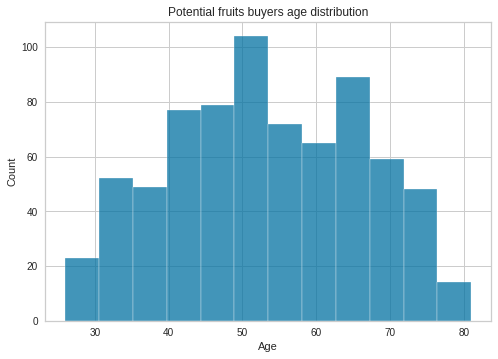

In [86]:
sns.histplot(data_fruits[data_fruits['Cluster'] == 0]['Age'])
plt.title('Potential fruits buyers age distribution')

In [87]:
data_fruits[(data_fruits['Cluster'] == 0)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts()

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           123
1               1          0       0        0            80
0               3          0       0        0            57
                2          0       0        0            52
                1          0       0        1            43
1               2          0       0        0            38
                3          0       0        0            32
                1          1       0        0            23
                           0       0        1            22
0               1          1       0        0            21
                2          1       0        0            19
                           0       0        1            17
                3          0       0        1            16
                1          3       0        0            14
                2          3       0        0            12
1               1          3       0        0  

In [88]:
# pl = sns.scatterplot(data = data_fruits, x = data_fruits["Age"], y = data_fruits["Education"], hue = data_fruits["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential fruits buyers are most likely to have these criterias:

1.   In their early **40**s to late **60**s.
2.   **Higher education** (at least a university graduate, and **most** are buyers are **Undergraduates**.)
3.   **Do not** have any kid and **at most** 1 teen at home.
4.   Have **high income** (USD 68K++ Annual income).

## Meat

In [89]:
data_meat.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Meat', 'Cluster'],
      dtype='object')

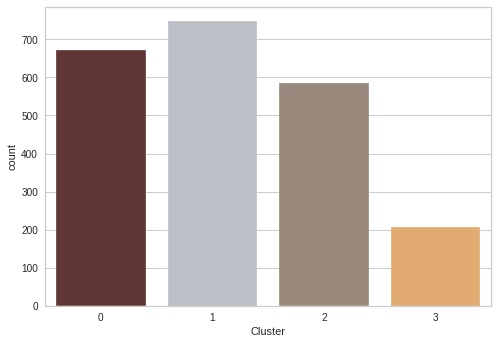

In [90]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_meat, palette = pal)

In [91]:
potential_meat_cluster = data_meat[data_meat['Meat'] > data_meat['Meat'].mean()]['Cluster'].values

dct_meat = {}
for item in potential_meat_cluster:
  if item not in dct_meat:
    dct_meat[item] = 1

  else:
    dct_meat[item] += 1

for key, value in dct_meat.items():
  print(f"Cluster {key} percentage: {100*value/len(data_meat[data_meat['Cluster'] == key])} %")

Cluster 0 percentage: 75.63150074294205 %
Cluster 1 percentage: 16.176470588235293 %
Cluster 3 percentage: 17.391304347826086 %
Cluster 2 percentage: 4.280821917808219 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [92]:
for col in data_meat.columns:
  print(f"============ {col} ============")
  print(data_meat[data_meat['Cluster'] == 0][col].value_counts())
  print()

============ Age ============
52    26
57    24
53    23
63    22
40    22
64    22
46    19
51    19
35    18
47    17
39    17
60    17
50    16
70    16
44    16
55    15
36    15
45    15
62    15
48    15
65    14
56    14
68    14
71    13
67    13
66    13
59    13
43    13
61    13
34    12
42    12
33    11
49    11
73    11
74    10
69    10
58    10
31    10
41     9
75     9
54     8
37     8
38     8
32     7
30     6
76     6
29     5
79     4
77     4
28     3
78     3
27     3
72     3
81     1
Name: Age, dtype: int64

============ Education ============
1    357
2    163
3    137
0     16
Name: Education, dtype: int64

============ Marital_Status ============
0    407
1    266
Name: Marital_Status, dtype: int64

============ Income ============
0    490
1     85
3     64
2     34
Name: Income, dtype: int64

============ Kidhome ============
0    648
1     25
Name: Kidhome, dtype: int64

============ Teenhome ============
0    560
1    110
2      3
Name: Teenhome, dtype

Text(0.5, 1.0, 'Potential meat buyers age distribution')

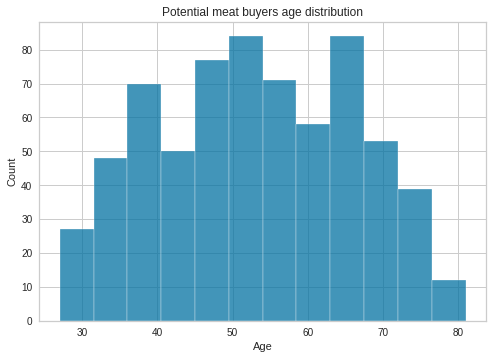

In [93]:
sns.histplot(data_meat[data_meat['Cluster'] == 0]['Age'])
plt.title('Potential meat buyers age distribution')

In [94]:
data_meat[(data_meat['Cluster'] == 0)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts()

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           120
1               1          0       0        0            79
0               3          0       0        0            56
                2          0       0        0            52
                1          0       0        1            41
1               2          0       0        0            38
                3          0       0        0            31
                1          0       0        1            21
                           1       0        0            21
0               1          3       0        0            17
                2          1       0        0            15
1               1          3       0        0            14
0               1          1       0        0            13
                3          0       0        1            12
                0          1       0        0            12
                2          3       0        0  

In [95]:
# pl = sns.scatterplot(data = data_meat, x = data_meat["Age"], y = data_meat["Education"], hue = data_meat["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential meat buyers are most likely to have these criterias:

1.   In their late **30**s to late **60**s.
2.   **Higher education** (at least a university graduate, and **most** are buyers are **Undergraduates**.)
3.   **Do not** have any kid and **at most** 1 teen at home.
4.   Have **high income** (USD 68K++ Annual income).

## Fish

In [96]:
data_fish.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Fish', 'Cluster'],
      dtype='object')

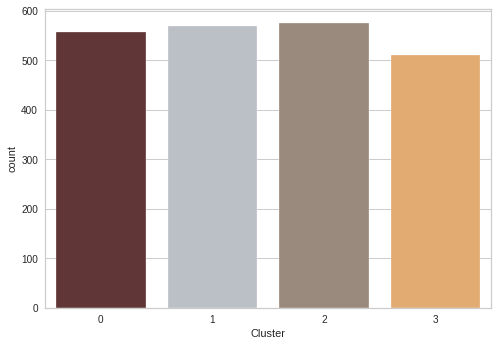

In [97]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_fish, palette = pal)

In [98]:
potential_fish_cluster = data_fish[data_fish['Fish'] > data_fish['Fish'].mean()]['Cluster'].values

dct_fish = {}
for item in potential_fish_cluster:
  if item not in dct_fish:
    dct_fish[item] = 1

  else:
    dct_fish[item] += 1

for key, value in dct_fish.items():
  print(f"Cluster {key} percentage: {100*value/len(data_fish[data_fish['Cluster'] == key])} %")

Cluster 0 percentage: 24.95511669658887 %
Cluster 2 percentage: 69.91304347826087 %
Cluster 1 percentage: 12.126537785588752 %
Cluster 3 percentage: 9.197651663405088 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [99]:
for col in data_fish.columns:
  print(f"============ {col} ============")
  print(data_fish[data_fish['Cluster'] == 2][col].value_counts())
  print()

============ Age ============
57    24
52    21
64    20
50    19
47    18
53    18
40    18
46    17
62    17
71    17
63    16
68    16
60    16
48    15
70    15
45    13
39    13
36    12
74    12
51    12
66    12
49    12
35    12
58    11
41    11
56    11
67    11
75    11
43    11
73    10
61    10
44    10
65    10
76     9
33     9
59     9
42     9
69     8
54     7
38     6
34     5
31     5
55     5
37     4
77     4
79     4
78     4
72     4
32     3
29     3
30     2
28     2
81     1
27     1
Name: Age, dtype: int64

============ Education ============
1    270
2    162
3    137
0      6
Name: Education, dtype: int64

============ Marital_Status ============
0    361
1    214
Name: Marital_Status, dtype: int64

============ Income ============
0    443
1     59
3     40
2     33
Name: Income, dtype: int64

============ Kidhome ============
0    560
1     15
Name: Kidhome, dtype: int64

============ Teenhome ============
0    461
1    112
2      2
Name: Teenhome, dtype

Text(0.5, 1.0, 'Potential fish buyers age distribution')

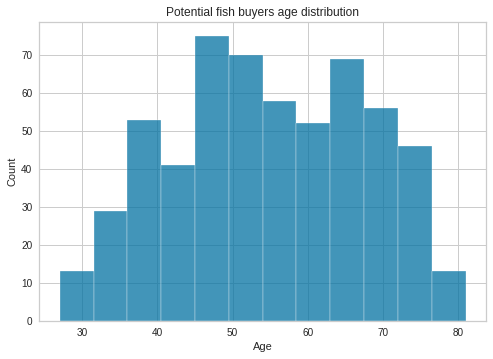

In [100]:
sns.histplot(data_fish[data_fish['Cluster'] == 2]['Age'])
plt.title('Potential fish buyers age distribution')

In [101]:
data_fish[(data_fish['Cluster'] == 2)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts()

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           111
1               1          0       0        0            61
0               3          0       0        0            56
                2          0       0        0            48
1               2          0       0        0            33
                3          0       0        0            31
0               1          0       0        1            28
1               1          0       0        1            19
0               2          0       0        1            16
                3          0       0        1            16
                2          1       0        0            14
1               1          1       0        0            10
0               2          3       0        0             9
                1          1       0        0             8
                           2       0        0             8
1               2          1       0        0  

In [102]:
# pl = sns.scatterplot(data = data_fish, x = data_fish["Age"], y = data_fish["Education"], hue = data_fish["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential fish buyers are most likely to have these criterias:

1.   In their late **40**s to mid **70**s.
2.   **Higher education** (at least a university graduate, and **most** are buyers are **Undergraduates**.)
3.   **Do not** have any kid and teen at home.
4.   Have **high income** (USD 68K++ Annual income).

## Sweets

In [103]:
data_sweets.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Sweets', 'Cluster'],
      dtype='object')

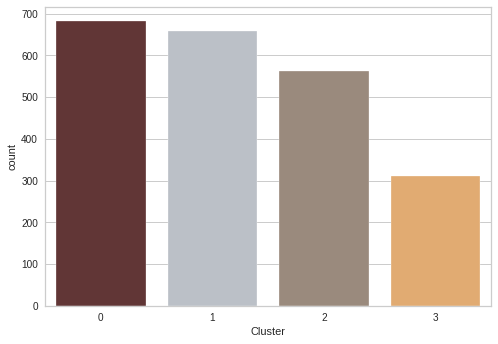

In [104]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_sweets, palette = pal)

In [105]:
potential_sweets_cluster = data_sweets[data_sweets['Sweets'] > data_sweets['Sweets'].mean()]['Cluster'].values

dct_sweets = {}
for item in potential_sweets_cluster:
  if item not in dct_sweets:
    dct_sweets[item] = 1

  else:
    dct_sweets[item] += 1

for key, value in dct_sweets.items():
  print(f"Cluster {key} percentage: {100*value/len(data_sweets[data_sweets['Cluster'] == key])} %")

Cluster 1 percentage: 23.59208523592085 %
Cluster 2 percentage: 69.3950177935943 %
Cluster 0 percentage: 11.290322580645162 %
Cluster 3 percentage: 3.8585209003215435 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [106]:
for col in data_sweets.columns:
  print(f"============ {col} ============")
  print(data_sweets[data_sweets['Cluster'] == 2][col].value_counts())
  print()

============ Age ============
57    28
63    22
52    20
47    20
51    19
64    19
71    17
53    17
62    17
60    17
70    15
40    15
46    15
68    14
59    14
50    13
48    13
45    13
39    12
74    12
35    11
61    11
44    11
67    11
75    11
66    11
73    10
55    10
58     9
49     9
43     9
56     9
36     9
33     8
42     8
65     8
69     8
38     7
54     7
76     7
41     6
72     5
31     5
34     5
79     4
77     4
32     3
78     3
29     3
37     3
30     2
81     1
28     1
27     1
Name: Age, dtype: int64

============ Education ============
1    277
2    144
3    138
0      3
Name: Education, dtype: int64

============ Marital_Status ============
0    354
1    208
Name: Marital_Status, dtype: int64

============ Income ============
0    447
1     54
3     32
2     29
Name: Income, dtype: int64

============ Kidhome ============
0    553
1      9
Name: Kidhome, dtype: int64

============ Teenhome ============
0    443
1    118
2      1
Name: Teenhome, dtype

Text(0.5, 1.0, 'Potential sweets buyers age distribution')

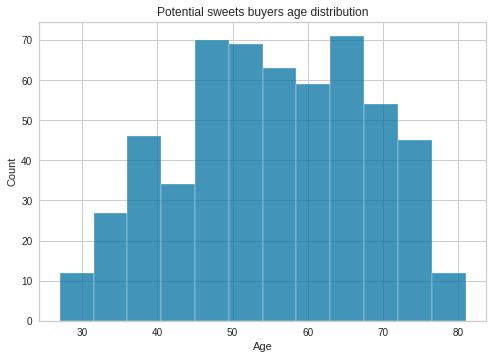

In [107]:
sns.histplot(data_sweets[data_sweets['Cluster'] == 2]['Age'])
plt.title('Potential sweets buyers age distribution')

In [108]:
data_sweets[(data_sweets['Cluster'] == 2)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts()

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           103
1               1          0       0        0            60
0               3          0       0        0            57
                2          0       0        0            50
                1          0       0        1            40
1               2          0       0        0            33
                3          0       0        0            32
                1          0       0        1            22
0               3          0       0        1            16
                1          1       0        0            14
                2          0       0        1            13
1               1          1       0        0            12
0               2          1       0        0            10
1               2          1       0        0             8
                           0       0        1             7
0               2          2       0        0  

In [109]:
# pl = sns.scatterplot(data = data_sweets, x = data_sweets["Age"], y = data_sweets["Education"], hue = data_sweets["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential sweets buyers are most likely to have these criterias:

1.   In their late **40**s to mid **70**s.
2.   **Higher education** (at least a university graduate, and **most** are buyers are **Undergraduates**.)
3.   **Do not** have any kid and teen at home.
4.   Have **high income** (USD 68K++ Annual income).

## Gold

In [110]:
data_gold.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Duration_Customer', 'Recency', 'Gold', 'Cluster'],
      dtype='object')

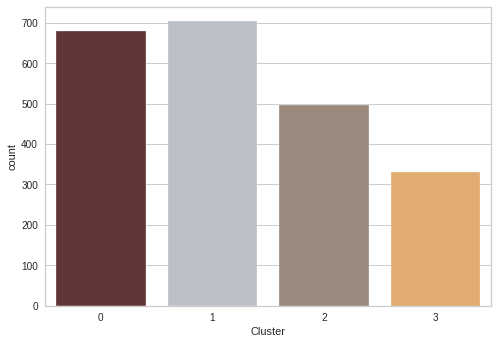

In [111]:
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#413D5C']
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

sns.countplot(x = "Cluster", data = data_gold, palette = pal)

In [112]:
potential_gold_cluster = data_gold[data_gold['Gold'] > data_gold['Gold'].mean()]['Cluster'].values

dct_gold = {}
for item in potential_gold_cluster:
  if item not in dct_gold:
    dct_gold[item] = 1

  else:
    dct_gold[item] += 1

for key, value in dct_gold.items():
  print(f"Cluster {key} percentage: {100*value/len(data_gold[data_gold['Cluster'] == key])} %")

Cluster 1 percentage: 39.63068181818182 %
Cluster 0 percentage: 52.64705882352941 %
Cluster 3 percentage: 6.948640483383686 %
Cluster 2 percentage: 7.2434607645875255 %


So, we can conclude that the potential wine customers are in the Cluster 2. Now, we will see the customer characteristics on each cluster.

In [113]:
for col in data_gold.columns:
  print(f"============ {col} ============")
  print(data_gold[data_gold['Cluster'] == 2][col].value_counts())
  print()

============ Age ============
44    36
51    29
46    29
36    27
43    27
38    25
49    25
39    24
50    23
48    23
37    22
52    22
45    21
42    20
40    18
41    18
47    18
33    18
34    16
53    15
54    10
35    10
55     8
32     6
30     4
57     1
31     1
26     1
Name: Age, dtype: int64

============ Education ============
1    260
2    130
3     74
0     33
Name: Education, dtype: int64

============ Marital_Status ============
0    332
1    165
Name: Marital_Status, dtype: int64

============ Income ============
1    325
2    135
3     20
0     17
Name: Income, dtype: int64

============ Kidhome ============
1    476
2     17
0      4
Name: Kidhome, dtype: int64

============ Teenhome ============
0    474
1     23
Name: Teenhome, dtype: int64

============ Duration_Customer ============
3101    5
3194    4
3494    4
3254    4
3485    4
       ..
3138    1
3580    1
3393    1
3557    1
3470    1
Name: Duration_Customer, Length: 334, dtype: int64

============ Recenc

Text(0.5, 1.0, 'Potential gold buyers age distribution')

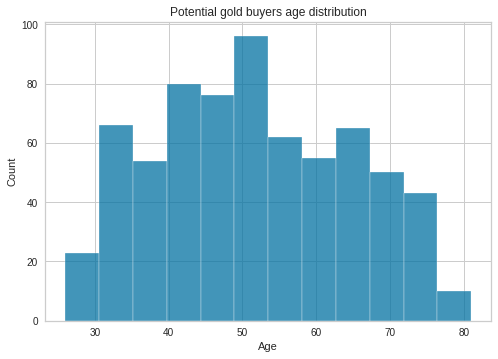

In [114]:
sns.histplot(data_gold[data_gold['Cluster'] == 0]['Age'])
plt.title('Potential gold buyers age distribution')

In [115]:
data_gold[(data_gold['Cluster'] == 0)][['Marital_Status', 'Education', 'Income', 'Kidhome', 'Teenhome']].value_counts()

Marital_Status  Education  Income  Kidhome  Teenhome
0               1          0       0        0           123
1               1          0       0        0            82
0               3          0       0        0            57
                2          0       0        0            52
                1          0       0        1            41
1               2          0       0        0            38
                3          0       0        0            32
                1          1       0        0            25
0               1          1       0        0            24
1               1          0       0        1            23
0               2          1       0        0            19
                1          3       0        0            13
                0          1       0        0            13
                2          0       0        1            13
1               2          1       0        0            10
                1          3       0        0  

In [116]:
# pl = sns.scatterplot(data = data_gold,x = data_gold["Age"], y = data_gold["Education"], hue = data_gold["Cluster"], palette = pal)
# pl.set_title("Cluster's Profile Based On Education And Wines")
# plt.legend()
# plt.show()

From above, we can see that the potential gold buyers are most likely to have these criterias:

1.   In their early **30**s to late **60**s.
2.   **Higher education** (at least a university graduate, and **most** are buyers are **Undergraduates**.)
3.   **Do not** have any kid and teen at home.
4.   Have **high income** (USD 68K++ Annual income).

# Other Features

In [117]:
data.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Duration_Customer', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Discount', 'Web', 'Catalog', 'Store',
       'Web_visit', 'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4',
       'Campaign 5', 'Complain', 'Response'],
      dtype='object')

In [118]:
data['Wines_Cluster'] = data_wines['Cluster']
data['Fruits_Cluster'] = data_fruits['Cluster']
data['Meat_Cluster'] = data_meat['Cluster']
data['Fish_Cluster'] = data_fish['Cluster']
data['Sweets_Cluster'] = data_sweets['Cluster']
data['Gold_Cluster'] = data_gold['Cluster']

Wines best cluster: 2, 3

Fruits best cluster: 0

Meat best cluster: 0

Fish best cluster: 2

Wines best cluster: 2

Wines best cluster: 0

## Discount

### Wines

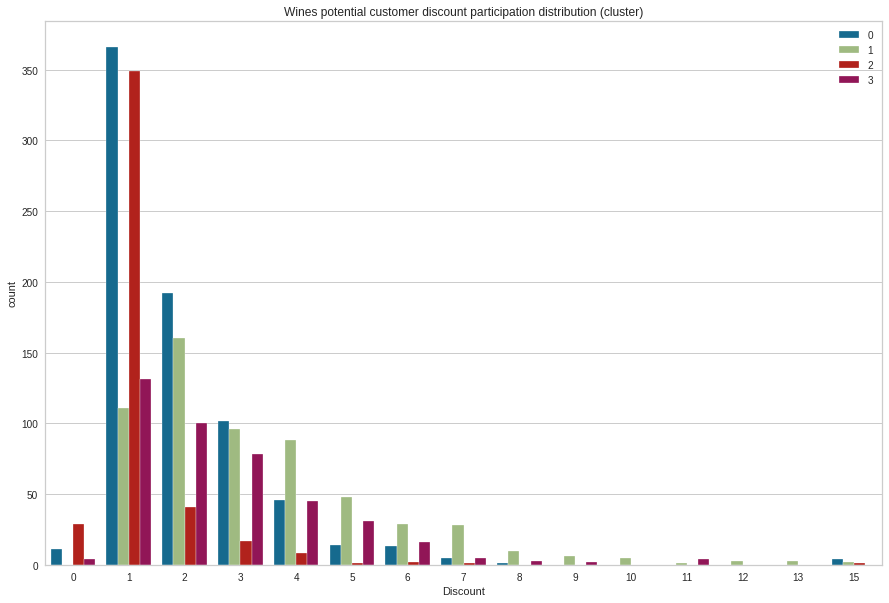

In [119]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Wines_Cluster')
plt.title('Wines potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fruits

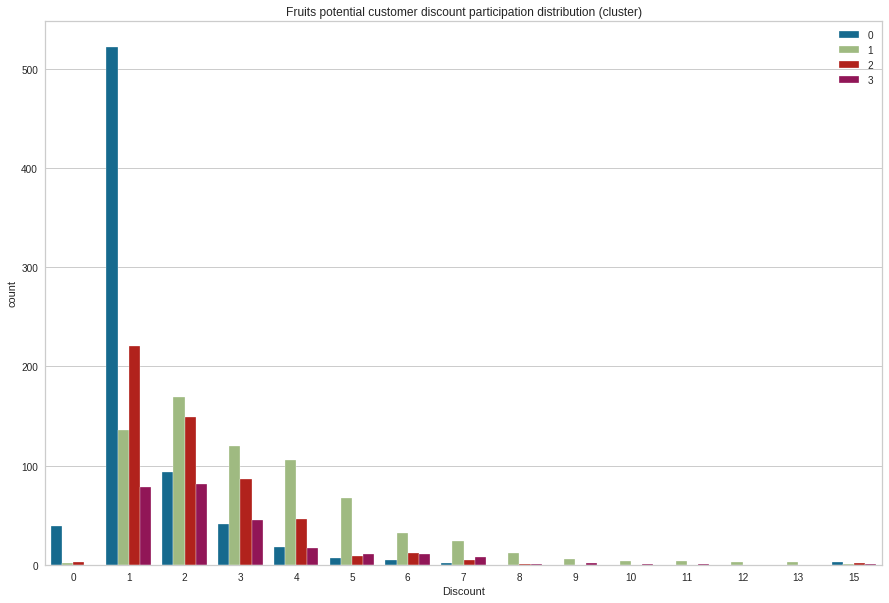

In [120]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fruits_Cluster')
plt.title('Fruits potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Meat

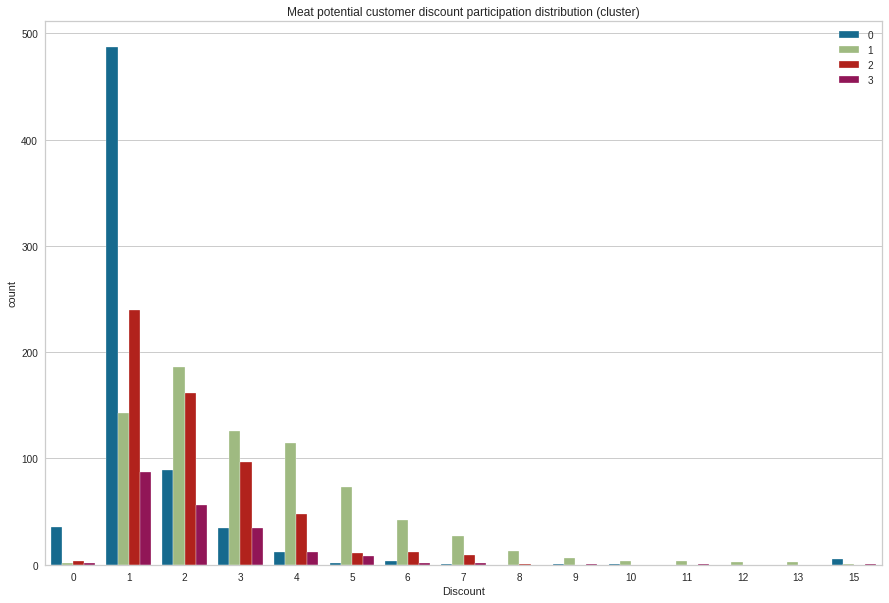

In [121]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Meat_Cluster')
plt.title('Meat potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fish

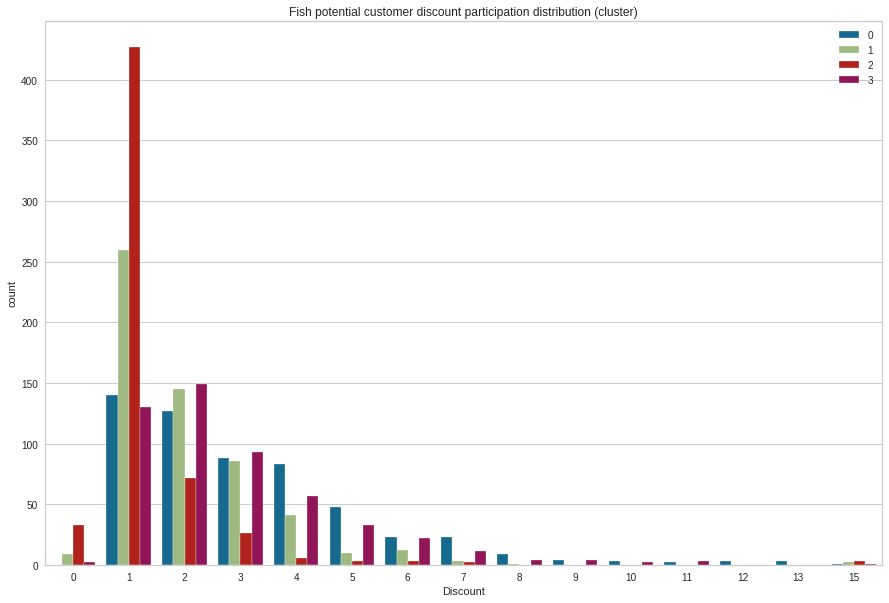

In [122]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fish_Cluster')
plt.title('Fish potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Sweets

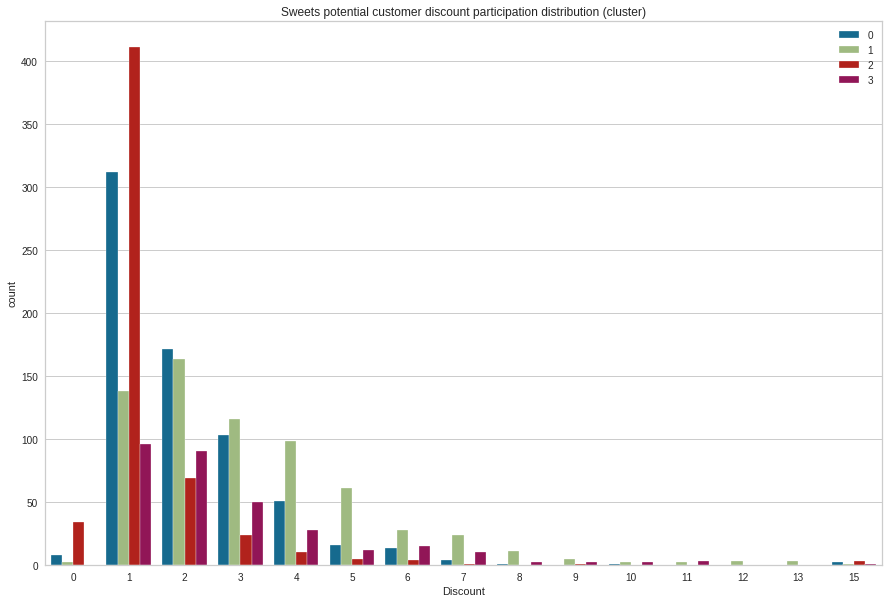

In [123]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Sweets_Cluster')
plt.title('Sweets potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Gold

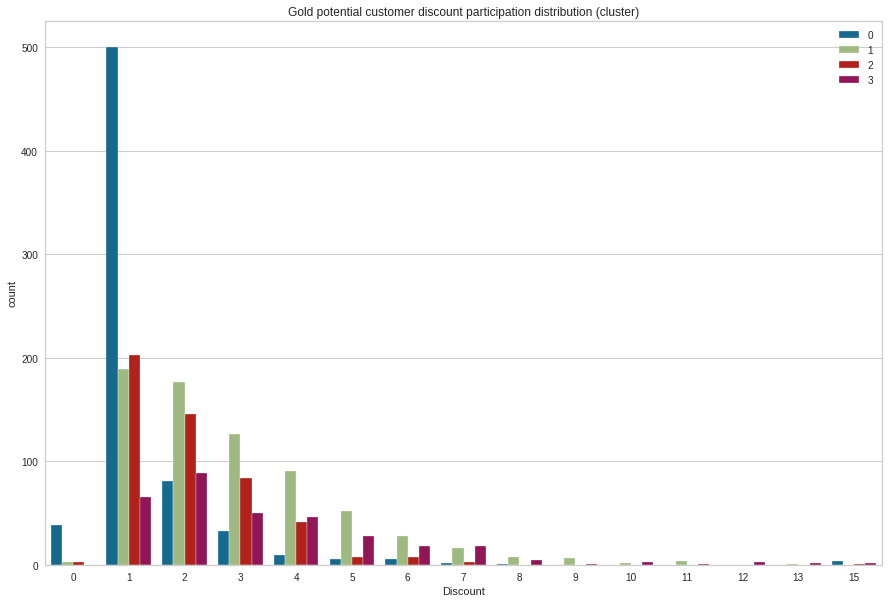

In [124]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Gold_Cluster')
plt.title('Gold potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

## Media

We will see potential buyers' media preference on buying products by counting the percentage of customers who use certain media more than once.

### Wines

In [125]:
# Web

100*len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3) & (data['Web'] > 1)])/len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

96.31336405529954

In [126]:
# Catalogue

100*len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3) & (data['Catalog'] > 1)])/len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

86.63594470046083

In [127]:
# Store

100*len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3) & (data['Store'] > 1)])/len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

99.53917050691244

### Fruits

In [128]:
# Web

100*len(data[(data['Fruits_Cluster'] == 0) & (data['Web'] > 1)])/len(data[(data['Fruits_Cluster'] == 0)])

91.79206566347469

In [129]:
# Catalogue

100*len(data[(data['Fruits_Cluster'] == 0) & (data['Catalog'] > 1)])/len(data[(data['Fruits_Cluster'] == 0)])

82.9001367989056

In [130]:
# Store

100*len(data[(data['Fruits_Cluster'] == 0) & (data['Store'] > 1)])/len(data[(data['Fruits_Cluster'] == 0)])

98.49521203830369

### Meat

In [131]:
# Web

100*len(data[(data['Meat_Cluster'] == 0) & (data['Web'] > 1)])/len(data[(data['Meat_Cluster'] == 0)])

93.31352154531946

In [132]:
# Catalogue

100*len(data[(data['Meat_Cluster'] == 0) & (data['Catalog'] > 1)])/len(data[(data['Meat_Cluster'] == 0)])

86.32986627043091

In [133]:
# Store

100*len(data[(data['Meat_Cluster'] == 0) & (data['Store'] > 1)])/len(data[(data['Meat_Cluster'] == 0)])

98.51411589895989

### Fish

In [134]:
# Web

100*len(data[(data['Fish_Cluster'] == 2) & (data['Web'] > 1)])/len(data[(data['Fish_Cluster'] == 2)])

93.3913043478261

In [135]:
# Catalogue

100*len(data[(data['Fish_Cluster'] == 2) & (data['Catalog'] > 1)])/len(data[(data['Fish_Cluster'] == 2)])

85.73913043478261

In [136]:
# Store

100*len(data[(data['Fish_Cluster'] == 2) & (data['Store'] > 1)])/len(data[(data['Fish_Cluster'] == 2)])

98.43478260869566

### Sweets

In [137]:
# Web

100*len(data[(data['Sweets_Cluster'] == 2) & (data['Web'] > 1)])/len(data[(data['Sweets_Cluster'] == 2)])

93.59430604982207

In [138]:
# Catalogue

100*len(data[(data['Sweets_Cluster'] == 2) & (data['Catalog'] > 1)])/len(data[(data['Sweets_Cluster'] == 2)])

87.01067615658363

In [139]:
# Store

100*len(data[(data['Sweets_Cluster'] == 2) & (data['Store'] > 1)])/len(data[(data['Sweets_Cluster'] == 2)])

98.22064056939502

### Gold

In [140]:
# Web

100*len(data[(data['Gold_Cluster'] == 0) & (data['Web'] > 1)])/len(data[(data['Gold_Cluster'] == 0)])

91.91176470588235

In [141]:
# Catalogue

100*len(data[(data['Gold_Cluster'] == 0) & (data['Catalog'] > 1)])/len(data[(data['Gold_Cluster'] == 0)])

80.73529411764706

In [142]:
# Store

100*len(data[(data['Gold_Cluster'] == 0) & (data['Store'] > 1)])/len(data[(data['Gold_Cluster'] == 0)])

98.38235294117646

## Campaign

In [143]:
data[['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1754
                        1           0           0              129
                        0           1           0               83
                                    0           1               57
1           0           0           0           0               52
0           0           0           1           1               24
1           0           0           1           1               23
                                    0           1               21
                        1           0           1               13
                        0           1           0               12
                        1           0           0                8
            1           0           1           1                8
0           1           0           1           0                8
            0           1           0           1                6
   

In [144]:
len(data)

2212

### Wines

In [145]:
data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             552
                                                1              54
                                    1           0              54
1           0           0           0           0              44
0           0           1           0           0              40
                        0           1           1              23
1           0           0           1           1              22
                                    0           1              19
                        1           0           1              13
                        0           1           0              11
            1           0           1           1               8
0           1           0           1           0               7
1           0           1           0           0               7
0           0           1           0           1               4
            1    

In [146]:
len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

868

### Fruits

In [147]:
data[(data['Fruits_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             483
                                                1              56
1           0           0           0           0              42
0           0           1           0           0              24
1           0           0           1           1              22
                                    0           1              20
0           0           0           1           1              18
                                                0              17
1           0           1           0           1              13
                        0           1           0               8
                        1           0           0               7
            1           0           1           1               6
0           0           1           0           1               4
            1           0           1           0               3
                 

In [148]:
len(data[(data['Fruits_Cluster'] == 0)])

731

### Meat

In [149]:
data[(data['Meat_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             431
                                                1              54
1           0           0           0           0              42
0           0           1           0           0              25
                        0           1           1              20
1           0           0           0           1              19
                                    1           1              19
0           0           0           1           0              13
1           0           1           0           1              12
            1           0           1           1               8
            0           0           1           0               7
                        1           0           0               7
0           0           1           0           1               5
            1           0           1           1               4
                 

In [150]:
len(data[(data['Meat_Cluster'] == 0)])

673

### Fish

In [151]:
data[(data['Fish_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             364
                                                1              49
1           0           0           0           0              39
0           0           1           0           0              20
1           0           0           0           1              19
                                    1           1              18
0           0           0           1           1              16
                                                0              12
1           0           1           0           1              10
                                                0               7
            1           0           1           1               6
            0           0           1           0               5
0           1           0           1           1               3
            0           1           0           1               2
1           1    

In [152]:
len(data[(data['Fish_Cluster'] == 2)])

575

### Sweets

In [153]:
data[(data['Sweets_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             357
                                                1              43
1           0           0           0           0              37
0           0           1           0           0              21
1           0           0           0           1              19
                                    1           1              17
0           0           0           1           1              16
1           0           1           0           1              12
0           0           0           1           0              12
1           1           0           1           1               8
            0           1           0           0               7
                        0           1           0               6
0           0           1           0           1               2
            1           0           1           0               2
                 

In [154]:
len(data[(data['Sweets_Cluster'] == 2)])

562

### Gold

In [155]:
data[(data['Gold_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             438
                                                1              53
1           0           0           0           0              39
0           0           1           0           0              25
1           0           0           1           1              23
                                    0           1              20
0           0           0           1           1              18
                                                0              14
1           0           1           0           1              12
            1           0           1           1               8
            0           1           0           0               7
                        0           1           0               6
0           0           1           0           1               4
            1           0           1           1               4
1           1    

In [156]:
len(data[(data['Gold_Cluster'] == 0)])

680

# Summary & Recommendations

## Summary



1.   In general, the target customers for all products are mostly in their **early 40**s – **late 60**s who is at least an **Undergraduate**, has **high**-income, and **do not** have any child at home.
2.   The **most popular** platform for potential customers are **store**, **web**, and **catalogue**, respectively.
3.   Overall, the **discount participation rate** is **very low** (including the potential customers for each product'). Perhaps the discount given is **not tempting** for the customers?
4.   The potential buyers' campaign participation rate are also very low (most are not participating even once)



## Recommendations



1.   Further sales and marketing **strategies** should be **focused** towards **Undergraduates** with **high** income, and **do not** have any kid (and teens, if possible) at home.
2.   The company should **upgrade** their **website**, as many potential customers are buying products
through website, and also as a mean to attract another customer segments.
3.   There needs to be a **promo** to attract buyers, especially the potential customers, so the amount of sold products will increase. 
4.   There needs to be a **better campaign strategy** on catching the attention for these customers, as we previously known that these customers are at least an Undergraduate, so they might be busy with work and do not have time on participating in the Campaign.

